In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv', index_col = 'PassengerId')
test = pd.read_csv('test.csv')
combine = [train, test]

In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Ryerson, Miss. Emily Borie",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
print(train.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
print(train.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [11]:
print(train.isnull().any())
print('\n\n')
print(test.isnull().any())

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool



PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [13]:
train.describe(percentiles = [.61, .62]) 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
survived_data = train[train['Survived'] == 1]
survived = survived_data.count().values[1]
survival_percent = (survived/891) * 100
print('The percentage of survived people in training data are {}'.format(survival_percent))

The percentage of survived people in training data are 38.38383838383838


In [16]:
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ryerson, Miss. Emily Borie",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [17]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values('Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

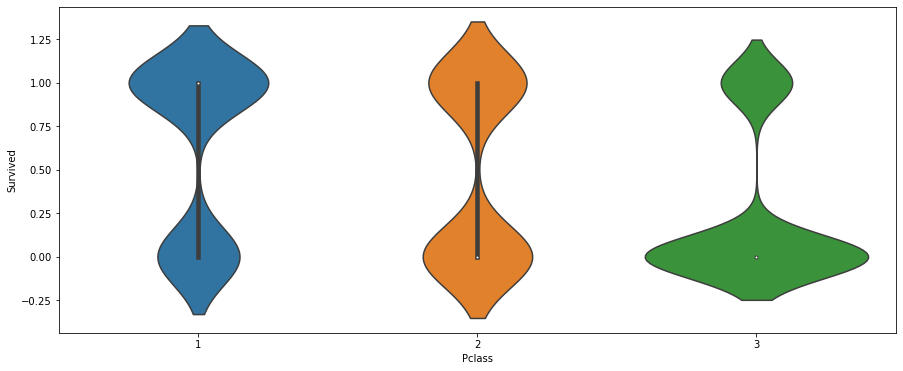

In [19]:
plt.figure(figsize = (15, 6))
#plt.axis([1,3,0,1])

sns.violinplot(data = train, x = 'Pclass', y = 'Survived')

In [20]:
# Relation between Sex and survival rate

train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

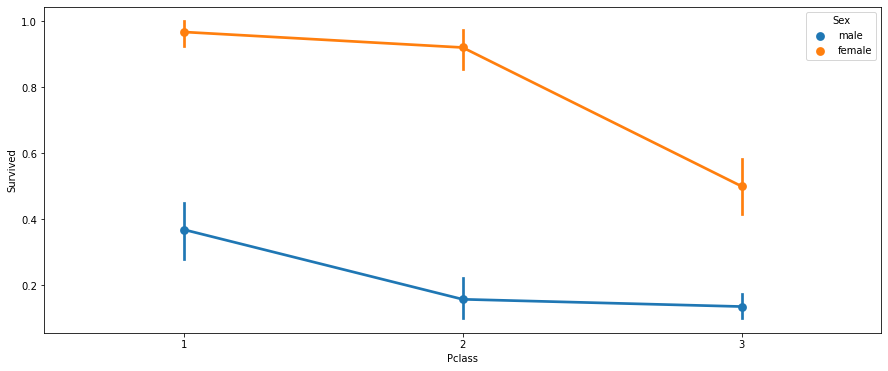

In [22]:
plt.figure(figsize = (15,6))
sns.pointplot(data = train, x = 'Pclass', y = 'Survived', hue = 'Sex')

In [24]:
train[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [25]:
print(train.groupby(['Sex']).count())
train[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).count()

        Survived  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Sex                                                                      
female       314     314   314  261    314    314     314   314     97   
male         577     577   577  453    577    577     577   577    107   

        Embarked  
Sex               
female       312  
male         577  


Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347

<Figure size 1080x432 with 0 Axes>

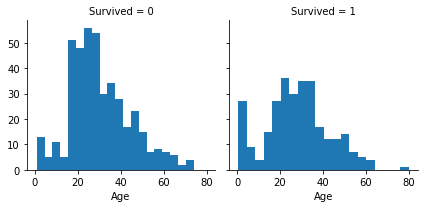

In [26]:
plt.figure(figsize = (15,6))
g = sns.FacetGrid(train, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)